In [2]:
import pandas as pd
import numpy as np
import csv


In [7]:
df = pd.read_csv('rt.movie_info.tsv', delimiter = '\t')

In [10]:
df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [11]:
df.to_csv('rtmovie_info.csv')

In [16]:
df2 = pd.read_csv('rt.reviews.tsv', delimiter = '\t', encoding = 'latin-1')
df2.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [17]:
import sqlite3

In [19]:
conn = sqlite3.connect('im.db')

In [43]:
persons_df = pd.read_sql("""
SELECT * 
FROM persons
""",conn )

movie_basics_df = pd.read_sql("""
SELECT * 
FROM movie_basics
""",conn )


In [28]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [31]:
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [35]:
movie_basics_df['movie_id'] = movie_basics_df['movie_id'].map(lambda x :int(x.replace('tt', '')))

In [36]:
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,63540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,66787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,69049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,69204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [46]:
tn_budgets_df = pd.read_csv('tn.movie_budgets.csv')

In [48]:
tn_budgets_df.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [52]:
movie_basics_df['primary_title'].value_counts()

Home                          24
Broken                        20
The Return                    20
Homecoming                    16
Alone                         16
                              ..
Raltat                         1
Dusk to Dusk                   1
Journey on the Wild Coast      1
Österreich: Oben und Unten     1
Aboard and Beyond              1
Name: primary_title, Length: 136071, dtype: int64

In [56]:
tn_budgets_df['primary_title'] = tn_budgets_df['movie']
tn_budgets_df.set_index('primary_title', inplace = True)

In [77]:
join1budget = movie_basics_df.join(tn_budgets_df, on='primary_title')

In [71]:
join2budget = movie_basics_df.join(tn_budgets_df, on='original_title')

In [74]:
join2budget_drop = join2budget.dropna(subset = ['id'])

In [105]:
join1budget_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 20 to 146078
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           3815 non-null   object 
 1   primary_title      3815 non-null   object 
 2   original_title     3814 non-null   object 
 3   start_year         3815 non-null   int64  
 4   runtime_minutes    3328 non-null   float64
 5   genres             3743 non-null   object 
 6   id                 3815 non-null   float64
 7   release_date       3815 non-null   object 
 8   movie              3815 non-null   object 
 9   production_budget  3815 non-null   object 
 10  domestic_gross     3815 non-null   object 
 11  worldwide_gross    3815 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 387.5+ KB


In [81]:
join1budget_drop = join1budget.dropna(subset = ['id'])
join1budget_drop.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
20,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26.0,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
33,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10.0,"Aug 18, 1995",Mortal Kombat,"$20,000,000","$70,433,227","$122,133,227"
40,tt0326592,The Overnight,The Overnight,2010,88.0,None,21.0,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
48,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37.0,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"


In [94]:
working_df = join1budget_drop
join1budget_drop['production_budget'].replace(",","", inplace=True)
join1budget_drop['domestic_gross'].replace(",","", inplace = True)
join1budget_drop['worldwide_gross'].replace(",","", inplace = True)

In [96]:
working_df.to_csv('practice_join.csv')

In [97]:
fixed_num_df = pd.read_csv('practice_join.csv')

In [98]:
fixed_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3815 entries, 0 to 3814
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3815 non-null   int64  
 1   movie_id           3815 non-null   object 
 2   primary_title      3815 non-null   object 
 3   original_title     3814 non-null   object 
 4   start_year         3815 non-null   int64  
 5   runtime_minutes    3328 non-null   float64
 6   genres             3743 non-null   object 
 7   id                 3815 non-null   int64  
 8   release_date       3815 non-null   object 
 9   movie              3815 non-null   object 
 10  production_budget  3815 non-null   float64
 11  domestic_gross     3815 non-null   float64
 12  worldwide_gross    3815 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 387.6+ KB


In [100]:
genres_totals_df = fixed_num_df.groupby('genres').sum()

Unnamed: 0  start_year  runtime_minutes  id     production_budget  domestic_gross  worldwide_gross
34262919    1001220     36989.0          24450  9.963816e+09       1.106544e+10    2.128485e+10       1
94668       2017        117.0            80     9.000000e+07       0.000000e+00    0.000000e+00       1
84229       4026        214.0            170    2.500000e+07       3.976600e+04    1.362234e+07       1
85326       2015        127.0            2      4.000000e+06       9.427026e+06    1.917482e+07       1
85936       2019        100.0            94     6.500000e+07       6.968838e+07    6.968838e+07       1
                                                                                                     ..
283225      14092       697.0            344    5.840000e+07       1.196741e+08    2.238162e+08       1
284075      16121       1017.0           532    2.845000e+08       5.653262e+08    1.150061e+09       1
292590      10075       454.0            223    5.800000e+07       1.

<BarContainer object of 345 artists>

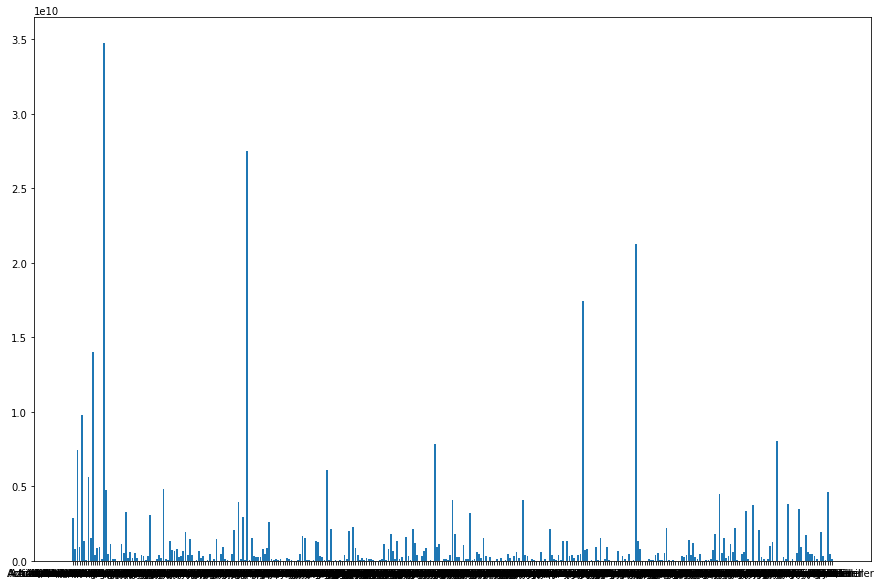

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(15,10))

ax.bar(genres_totals_df.index, genres_totals_df['worldwide_gross'])

In [110]:

bom_movie_df = pd.read_csv('bom.movie_gross.csv')

In [116]:
bom_movie_df.groupby('studio').sum().sort_values('domestic_gross', ascending= False)

,domestic_gross,year
studio,,
BV,1.841903e+10,213451
Uni.,1.290239e+10,296082
WB,1.216805e+10,281941
Fox,1.094950e+10,273882
Sony,8.459683e+09,221575
...,...,...
ALP,2.800000e+03,2011
Synergetic,2.400000e+03,2018
DR,8.000000e+02,2014


In [119]:
!ls

all_data.xlsx
bom.movie_gross.csv
bomwithgenres_roughdraft.csv
convert_tsv_csv.ipynb
csv_data.csv
genre_id_key.csv
im.db
im.db.zip
practice_join.csv
rt.movie_info.tsv
rt.reviews.tsv
rt_reviews.csv
rtmovie_info.csv
tmdb.movies.csv
tn.movie_budgets.csv
~$all_data.xlsx


In [118]:
tmdb_df = pd.read_csv('tmdb.movies.csv')
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,11/19/2010,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,3/26/2010,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,5/7/2010,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,11/22/1995,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,7/16/2010,Inception,8.3,22186


In [121]:
pd.read_csv('bomwithgenres_roughdraft.csv').head()

,title,studio,domestic_gross,foreign_gross,year,genre pull,pull from tmdb
0,Toy Story 3,BV,415000000.0,652000000,2010,"Adventure,Animation,Comedy","[16, 10751, 35]"
1,Alice in Wonderland,BV,334200000.0,691300000,2010,"Adventure,Family,Fantasy","[10751, 14, 12]"
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,NaN,NaN
3,Inception,WB,292600000.0,535700000,2010,"Action,Adventure,Sci-Fi","[28, 878, 12]"
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,"Adventure,Animation,Comedy","[35, 12, 14, 16, 10751]"


In [124]:
genre_key_df = pd.read_csv('genre_id_key.csv')
genre_key_df = genre_key_df[['Genre', 'Genre ID']]
genre_key_df

,Genre,Genre ID
0,Action,28
1,Adventure,12
2,Animation,16
3,Comedy,35
4,Crime,80
5,Documentary,99
6,Drama,18
7,Family,10751
8,Fantasy,14
9,History,36


In [128]:
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


# CLEANING TITLE

In [137]:
#cleaning title from movie basics file pulled from imdb db (sql)
movie_basics_df['clean_title'] = movie_basics_df['primary_title'].str.lower()

In [146]:
movie_basics_df['clean_title'] = movie_basics_df['clean_title'].str.replace("'","").breplace(',', '').replace(':','').replace('.','').replace('-','')

In [153]:
movie_basics_df.reset_index(inplace = True)
movie_basics_df.head()

,clean_title,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,sunghursh,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,one day before the rainy season,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,the other side of the wind,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,sabse bada sukh,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,the wandering soap opera,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


# CLEANING tn budgets title

In [162]:
tn_budgets_df.head()

,clean_title,primary_title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,avatar,Avatar,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,pirates of the caribbean: on stranger tides,Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,dark phoenix,Dark Phoenix,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,avengers: age of ultron,Avengers: Age of Ultron,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,star wars ep. viii: the last jedi,Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [163]:
tn_budgets_df.set_index('clean_title', inplace = True)
tn_budgets_df['clean_title'] = tn_budgets_df['primary_title'].str.lower()

In [164]:
tn_budgets_df['clean_title'] =tn_budgets_df['clean_title'].str.replace("'","").replace(',', '').replace(':','').replace('.','').replace('-','')

In [165]:
#REDOING THE JOIN - make sure to get rid of primary_title
tn_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, avatar to my date with drew
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   primary_title      5782 non-null   object
 1   id                 5782 non-null   int64 
 2   release_date       5782 non-null   object
 3   movie              5782 non-null   object
 4   production_budget  5782 non-null   object
 5   domestic_gross     5782 non-null   object
 6   worldwide_gross    5782 non-null   object
 7   clean_title        5782 non-null   object
dtypes: int64(1), object(7)
memory usage: 406.5+ KB


In [199]:
tn_budgets_df.set_index('clean_title', inplace=True)
tn_imdb_join = movie_basics_df.join(tn_budgets_df, on='clean_title')

In [200]:
tn_imdb_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146353 entries, 0 to 146143
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   clean_title        146353 non-null  object 
 1   movie_id           146353 non-null  object 
 2   primary_title      146353 non-null  object 
 3   original_title     146332 non-null  object 
 4   start_year         146353 non-null  int64  
 5   runtime_minutes    114581 non-null  float64
 6   genres             140940 non-null  object 
 7   index              3897 non-null    float64
 8   id                 3897 non-null    float64
 9   release_date       3897 non-null    object 
 10  movie              3897 non-null    object 
 11  production_budget  3897 non-null    object 
 12  domestic_gross     3897 non-null    object 
 13  worldwide_gross    3897 non-null    object 
dtypes: float64(3), int64(1), object(10)
memory usage: 16.7+ MB


In [202]:
tn_imdb_join_r =movie_basics_df.join(tn_budgets_df, on='clean_title', how = 'right')

In [203]:
tn_imdb_join_r.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 7244 entries, 17060.0 to nan
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   clean_title        7244 non-null   object 
 1   movie_id           3897 non-null   object 
 2   primary_title      3897 non-null   object 
 3   original_title     3896 non-null   object 
 4   start_year         3897 non-null   float64
 5   runtime_minutes    3401 non-null   float64
 6   genres             3824 non-null   object 
 7   index              7244 non-null   int64  
 8   id                 7244 non-null   int64  
 9   release_date       7244 non-null   object 
 10  movie              7244 non-null   object 
 11  production_budget  7244 non-null   object 
 12  domestic_gross     7244 non-null   object 
 13  worldwide_gross    7244 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 848.9+ KB


#exploring the join

In [221]:

tn4xl_3 = tn_imdb_join.dropna(subset =['index'])


In [223]:
tn4xl_3.to_csv('tn4xl_3.csv')

In [192]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   clean_title      146144 non-null  object 
 1   movie_id         146144 non-null  object 
 2   primary_title    146144 non-null  object 
 3   original_title   146123 non-null  object 
 4   start_year       146144 non-null  int64  
 5   runtime_minutes  114405 non-null  float64
 6   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 7.8+ MB


In [501]:
tn_fixednum_df = pd.read_csv('tn4xl_3.csv')
tn_fixednum_df.head()

,Unnamed: 0,clean_title,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,20,foodfight!,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1325,26,31-Dec-12,Foodfight!,45000000.0,0.0,73706.0
1,33,mortal kombat,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",2509,10,18-Aug-95,Mortal Kombat,20000000.0,70433227.0,122133227.0
2,40,the overnight,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,5620,21,19-Jun-15,The Overnight,200000.0,1109808.0,1165996.0
3,48,on the road,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",2316,17,22-Mar-13,On the Road,25000000.0,720828.0,9313302.0
4,54,the secret life of walter mitty,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",436,37,25-Dec-13,The Secret Life of Walter Mitty,91000000.0,58236838.0,187861183.0


In [229]:
tn_fixednum_df.groupby('clean_title').sum()

,Unnamed: 0,start_year,runtime_minutes,index,id,production_budget,domestic_gross,worldwide_gross
clean_title,,,,,,,,
#horror,61037,2015,101.0,5115,16,1500000.0,0.0,0.000000e+00
10 cloverfield lane,5761,2016,103.0,4253,54,5000000.0,72082999.0,1.082864e+08
10 days in a madhouse,59400,2015,111.0,3447,48,12000000.0,14616.0,1.461600e+04
12 rounds,60853,2017,0.0,2636,37,20000000.0,12234694.0,1.730665e+07
12 strong,7385,2018,130.0,1663,64,35000000.0,45819713.0,7.111838e+07
...,...,...,...,...,...,...,...,...
zookeeper,5964,2011,102.0,570,71,80000000.0,80360866.0,1.708055e+08
zoolander 2,10724,2016,101.0,1163,64,50000000.0,28848693.0,5.534869e+07
zoom,383406,8063,254.0,6900,104,140000000.0,47957312.0,5.002475e+07


In [236]:
tn_fixednum_df.groupby('movie_id').count().sort_values('clean_title', ascending=False)

,Unnamed: 0,clean_title,primary_title,original_title,start_year,runtime_minutes,genres,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
movie_id,,,,,,,,,,,,,,
tt7281238,3,3,3,3,3,3,3,3,3,3,3,3,3,3
tt9701552,3,3,3,3,3,0,3,3,3,3,3,3,3,3
tt5884960,3,3,3,3,3,3,3,3,3,3,3,3,3,3
tt3506448,3,3,3,3,3,3,3,3,3,3,3,3,3,3
tt8601408,3,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt1972571,1,1,1,1,1,1,1,1,1,1,1,1,1,1
tt1972591,1,1,1,1,1,1,1,1,1,1,1,1,1,1
tt1972779,1,1,1,1,1,1,1,1,1,1,1,1,1,1


# ADDING BOOLEAN GENRES TO TN

In [284]:
bom_genres_1_df= pd.read_csv('bomwithgenres_roughdraft.csv', encoding='latin-1')
bom_genres_1_df.head()

,title,clean_title,studio,domestic_gross,foreign_gross,year,genre_imdb,genre_tndb,Action,Adventure,...,History,Horror,Music,Mystery,Romance,Sci-Fi,TV Movie,Thriller,War,Western
0,Toy Story 3,toy story 3,BV,415000000,652000000.0,2010,"Adventure,Animation,Comedy","[16, 10751, 35]",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alice in Wonderland,alice in wonderland,BV,334200000,691300000.0,2010,"Adventure,Family,Fantasy","[10751, 14, 12]",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,harry potter and the deathly hallows part 1,WB,296000000,664300000.0,2010,NaN,"[12, 14, 10751]",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,inception,WB,292600000,535700000.0,2010,"Action,Adventure,Sci-Fi","[28, 878, 12]",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shrek Forever After,shrek forever after,P/DW,238700000,513900000.0,2010,"Adventure,Animation,Comedy","[35, 12, 14, 16, 10751]",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [502]:
#bom_genres_1_df['Action'] = (bom_genres_1_df['genre_imdb'].str.contains('Action'))
for x in imdb_genres:
    tn_fixednum_df[x] = (tn_fixednum_df['genres'].str.contains(x))

In [506]:
tn_fixednum_df.head()

,Unnamed: 0,clean_title,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,index,id,...,Comedy,Drama,Fantasy,Mystery,Action,Sci-Fi,Romance,Crime,War,Documentary
0,20,foodfight!,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1325,26,...,True,False,False,False,True,False,False,False,False,False
1,33,mortal kombat,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",2509,10,...,False,False,True,False,True,False,False,False,False,False
2,40,the overnight,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,5620,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,48,on the road,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",2316,17,...,False,True,False,False,False,False,True,False,False,False
4,54,the secret life of walter mitty,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",436,37,...,True,True,False,False,False,False,False,False,False,False


<ipython-input-518-c9f6cc957f18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_tn['foreign_gross'] = test_tn['worldwide_gross'] - test_tn['domestic_gross']
<ipython-input-518-c9f6cc957f18>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test_tn.groupby('start_year')['domestic_gross', 'foreign_gross'].sum().sort_values('start_year').plot.bar(stacked=True)


<AxesSubplot:xlabel='start_year'>

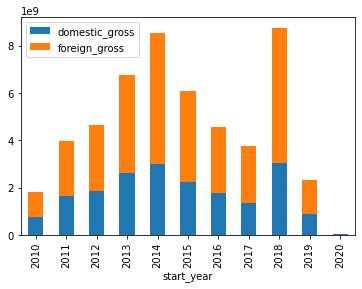

In [518]:
test_tn = tn_fixednum_df[tn_fixednum_df['Sci-Fi'] == True]
test_tn['foreign_gross'] = test_tn['worldwide_gross'] - test_tn['domestic_gross']
test_tn.groupby('start_year')['domestic_gross', 'foreign_gross'].sum().sort_values('start_year').plot.bar(stacked=True)

# THIS BABY below and the work to assemble the list

In [498]:
for x in imdb_genres:
    bom_genres_1_df[x] = (bom_genres_1_df['genres'].str.contains(x))
#this worked the first time accidentally ran it again and got the error

KeyError: 'genres'

bom_genres_1_df.head()

In [331]:
bom_genres_1_df.head()

,title,clean_title,studio,domestic_gross,foreign_gross,year,genre_imdb,genre_tndb,Action,Adventure,...,Mystery,Romance,Sci-Fi,TV Movie,Thriller,War,Western,Biography,Sport,Musical
0,Toy Story 3,toy story 3,BV,415000000,652000000.0,2010,"Adventure,Animation,Comedy","[16, 10751, 35]",False,True,...,False,False,False,NaN,False,False,False,False,False,False
1,Alice in Wonderland,alice in wonderland,BV,334200000,691300000.0,2010,"Adventure,Family,Fantasy","[10751, 14, 12]",False,True,...,False,False,False,NaN,False,False,False,False,False,False
2,Harry Potter and the Deathly Hallows Part 1,harry potter and the deathly hallows part 1,WB,296000000,664300000.0,2010,NaN,"[12, 14, 10751]",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,inception,WB,292600000,535700000.0,2010,"Action,Adventure,Sci-Fi","[28, 878, 12]",True,True,...,False,False,True,NaN,False,False,False,False,False,False
4,Shrek Forever After,shrek forever after,P/DW,238700000,513900000.0,2010,"Adventure,Animation,Comedy","[35, 12, 14, 16, 10751]",False,True,...,False,False,False,NaN,False,False,False,False,False,False


In [279]:
bom_genres_1_df['Adventure'] = (bom_genres_1_df['genre_imdb'].str.contains('Adventure'))
bom_genres_1_df['Thriller'] = (bom_genres_1_df['genre_imdb'].str.contains('Thriller'))
bom_genres_1_df['Animation'] = (bom_genres_1_df['genre_imdb'].str.contains('Animation'))


AttributeError: Can only use .str accessor with string values!

In [289]:
genres_imdb_list= set(list([x for x in bom_genres_1_df['genre_imdb']]))

In [304]:
genres_imdb_list = list(genres_imdb_list)
genres_imdb_list
genres_again = []
for x in genres_imdb_list:
       genres_again.append(str(x))


['nan',
 'Drama,History,War',
 'Adventure,Drama,Romance',
 '0',
 'Action,Drama,Thriller',
 'Comedy,Family,Fantasy',
 'Action,Biography,Crime',
 'Documentary,History',
 'Drama,Horror',
 'Action,Fantasy,War',
 'Thriller',
 'Drama,Thriller',
 'Drama,Sci-Fi',
 'Drama,Family,Sport',
 'Mystery,Thriller',
 'Action,Drama,History',
 'Comedy,Family',
 'Crime,Thriller',
 'Action,Adventure',
 'Comedy,Drama,Musical',
 'Crime,Drama,Mystery',
 'Horror',
 'Drama,Sport',
 'Action,Comedy,Horror',
 'Documentary,War',
 'Documentary,Drama,History',
 'Action,Mystery,Thriller',
 'Adventure,Family,Sci-Fi',
 'Documentary,Music',
 'Action,Adventure,Sci-Fi',
 'Action,Sci-Fi',
 'Animation,Comedy,Family',
 'Animation,Comedy,Drama',
 'Adventure,Comedy,Fantasy',
 'Drama,Fantasy,Mystery',
 'Drama,Fantasy,Romance',
 'Drama,Music,Romance',
 'Comedy,Fantasy,Horror',
 'Action,Biography,Comedy',
 'Comedy,Western',
 'Comedy,Crime',
 'Adventure,Comedy,Music',
 'Biography,Drama,War',
 'Comedy,Romance',
 'Documentary',
 'Dram

In [344]:
genres_again_2 = []
for x in genres_again:
    for y in x.split(sep =','):
        genres_again_2.append(y)
imdb_genres = list(set(genres_again_2))
imdb_genres.pop(1)
imdb_genres.pop(-9)
imdb_genres

['Biography',
 'Thriller',
 'Animation',
 'Western',
 'History',
 'Sport',
 'Music',
 'Family',
 'Adventure',
 'Horror',
 'Musical',
 'Comedy',
 'Drama',
 'Fantasy',
 'Mystery',
 'Action',
 'Sci-Fi',
 'Romance',
 'Crime',
 'War',
 'Documentary']

In [ ]:
#bom_genres_1_df.to_csv('bom_genres_numfix.csv')

In [477]:

bom_genres_fixed = pd.read_csv('bom_genres_numfix.csv')
bom_genres_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3387 non-null   int64  
 1   title           3387 non-null   object 
 2   clean_title     3387 non-null   object 
 3   studio          3382 non-null   object 
 4   domestic_gross  3359 non-null   float64
 5   foreign_gross   2037 non-null   float64
 6   year            3387 non-null   int64  
 7   genre_imdb      1185 non-null   object 
 8   genre_tndb      2407 non-null   object 
 9   Action          1185 non-null   object 
 10  Adventure       1185 non-null   object 
 11  Animation       1185 non-null   object 
 12  Comedy          1185 non-null   object 
 13  Crime           1185 non-null   object 
 14  Documentary     1185 non-null   object 
 15  Drama           1185 non-null   object 
 16  Family          1185 non-null   object 
 17  Fantasy         1185 non-null   o

In [480]:
test = bom_genres_fixed[(bom_genres_fixed['Sci-Fi'] == True)]

test['domestic_gross'] = test.loc[:,'domestic_gross'].map(int)

<ipython-input-480-994435770a2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['domestic_gross'] = test.loc[:,'domestic_gross'].map(int)


type(test)

In [475]:
test2 = bom_genres_fixed[(bom_genres_fixed['Fantasy'] == True)]

<ipython-input-493-09acf53d10d4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test.groupby(['studio'])['foreign_gross', 'domestic_gross'].sum().sort_values('domestic_gross', ascending=False).plot.bar(figsize = (18, 12), stacked=True)
<ipython-input-493-09acf53d10d4>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test2.groupby(['studio'])['foreign_gross', 'domestic_gross'].sum().sort_values('domestic_gross', ascending=False).plot.bar(figsize = (18, 12), stacked=True)


<AxesSubplot:xlabel='studio'>

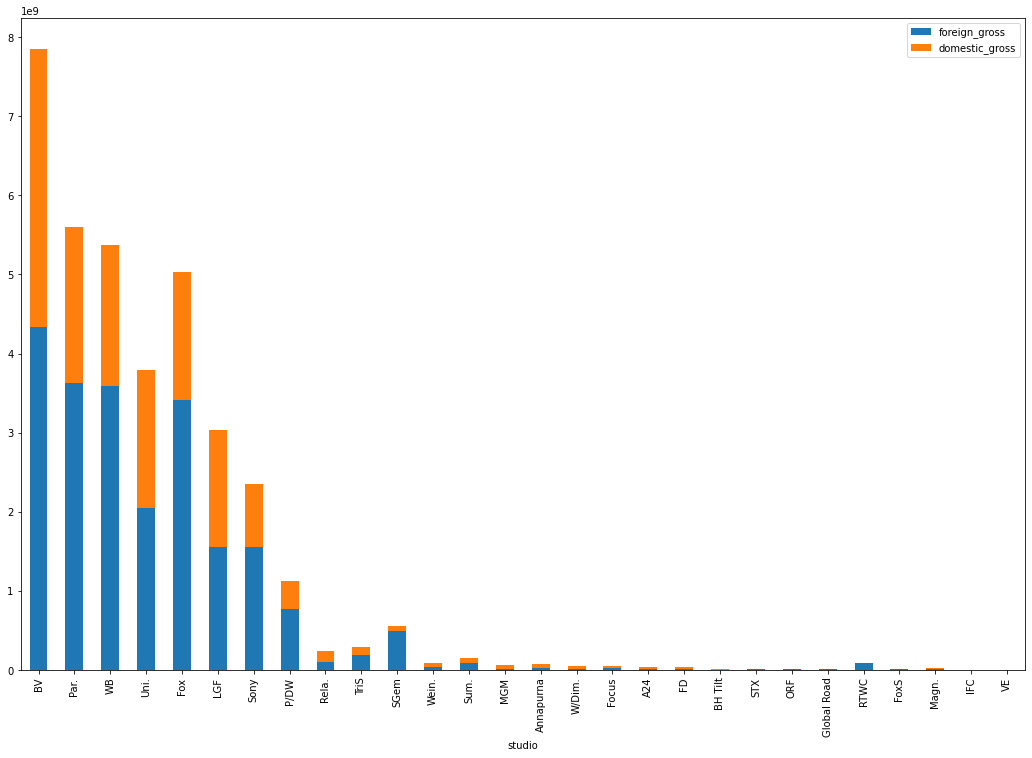

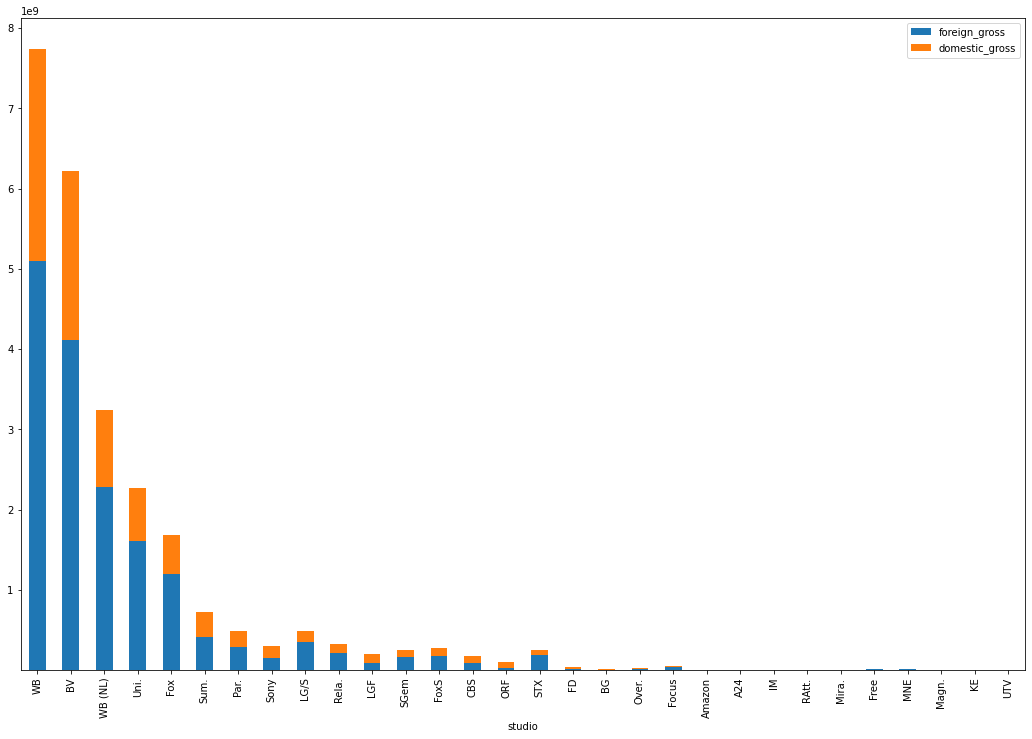

In [493]:
test.groupby(['studio'])['foreign_gross', 'domestic_gross'].sum().sort_values('domestic_gross', ascending=False).plot.bar(figsize = (18, 12), stacked=True)
test2.groupby(['studio'])['foreign_gross', 'domestic_gross'].sum().sort_values('domestic_gross', ascending=False).plot.bar(figsize = (18, 12), stacked=True)

In [419]:
bom_genres_fixed['domestic_gross'].fillna(0, inplace=True)
bom_genres_fixed.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3387 non-null   int64  
 1   title           3387 non-null   object 
 2   clean_title     3387 non-null   object 
 3   studio          3382 non-null   object 
 4   domestic_gross  3387 non-null   object 
 5   foreign_gross   2040 non-null   float64
 6   year            3387 non-null   int64  
 7   genre_imdb      1185 non-null   object 
 8   genre_tndb      2407 non-null   object 
 9   Action          1185 non-null   object 
 10  Adventure       1185 non-null   object 
 11  Animation       1185 non-null   object 
 12  Comedy          1185 non-null   object 
 13  Crime           1185 non-null   object 
 14  Documentary     1185 non-null   object 
 15  Drama           1185 non-null   object 
 16  Family          1185 non-null   object 
 17  Fantasy         1185 non-null   o

TypeError: 'generator' object is not callable

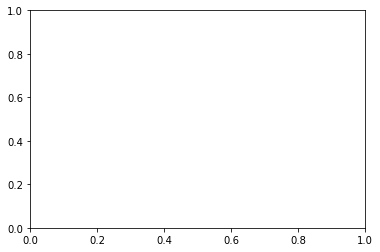

In [437]:
bom_genres_fixed['domestic_gross'].fillna(0, inplace = True)
bom_genres_fixed['domestic_gross'].astype('int64')

ValueError: invalid literal for int() with base 10: '936,700,000.00'